In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#Constants
N = 38005238
r_0 = 2.1
gamma = 1/14
beta = gamma*r_0
sigma = 1/5

In [39]:
#Dataframe declaration with initial values
df = pd.DataFrame(index=np.linspace(1,365, 365).astype(int), columns=["S","S'","E","E'","I","I'","R","R'"])
df.loc[1, 'E'] = 5000
df.loc[1, 'I'] = 10
df.loc[1, 'R'] = 5
df.loc[1, 'S'] = N-df.loc[1, 'E']-df.loc[1, 'I']-df.loc[1, 'R']
df.head()

,S,S',E,E',I,I',R,R'
1,38000223,NaN,5000,NaN,10,NaN,5,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Difference in days t_n-t_n-1=1
step_size = 1

#Populate dataframe using Euler's method
for index, row in df.iterrows():

    #S' from system
    df.loc[index, "S'"] = int(-beta/N*df.loc[index,'I']*df.loc[index, 'S'])
    #Using Euler's method with step size of S' over one day (multiplied by one)
    df.loc[index+1, 'S'] = df.loc[index, 'S']+df.loc[index, "S'"]*step_size

    #R' from system
    df.loc[index, "R'"] = int(gamma*df.loc[index, 'I'])
    #Using Euler's method
    df.loc[index+1, 'R'] = df.loc[index, 'R']+df.loc[index, "R'"]*step_size

    #E' from system
    df.loc[index, "E'"] = int(beta/N*df.loc[index,'I']*df.loc[index, 'S']-sigma*df.loc[index, 'E'])
    #Using Euler's method
    df.loc[index+1, 'E'] = df.loc[index, 'E']+df.loc[index, "E'"]*step_size

    #I' from system
    df.loc[index, "I'"] = (int)(sigma*df.loc[index, 'E']-gamma*df.loc[index, 'I'])
    #Using Euler's method
    df.loc[index+1, 'I'] = df.loc[index, 'I']+df.loc[index, "I'"]*step_size

    if (index==df.shape[0]-1):
        break

df.to_csv('seir_eulersdata.csv',index_label="Day")
df.head()

,S,S',E,E',I,I',R,R'
1,38000223,-1,5000,-998,10,999,5,0
2,38000222,-151,4002,-649,1009,728,5,72
3,38000071,-260,3353,-410,1737,546,77,124
4,37999811,-342,2943,-246,2283,425,201,163
5,37999469,-406,2697,-133,2708,345,364,193


In [41]:
#Copy over results and format to seaborn
plotdf = df.loc[:,['S','E','I','R']]
plotdf['day'] = df.index
plotdf = plotdf.melt('day',var_name='Letter',value_name='Value')
plotdf['Value'] = plotdf['Value'].astype(int)
plotdf.head()

,day,Letter,Value
0,1,S,38000223
1,2,S,38000222
2,3,S,38000071
3,4,S,37999811
4,5,S,37999469


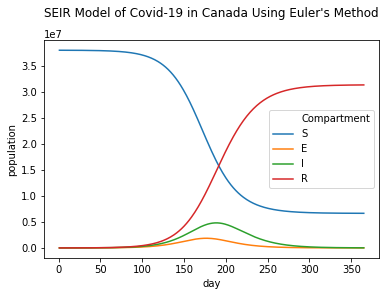

In [42]:
fig, ax = plt.subplots()

ax = sns.lineplot(data=plotdf, x='day', y='Value', hue='Letter')

ax.set_title("SEIR Model of Covid-19 in Canada Using Euler's Method",y=1.08)
ax.set_ylabel('population')
ax.legend().texts[0].set_text("Compartment")
fig.savefig('seir_eulers.png')